<a href="https://colab.research.google.com/github/DavidD95/Clase_EDA_2024/blob/main/Proyecto_ClaseEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pregunta SMART**


**1. Descripción del Problema para la Organización:**

Actualmente en el servicio de Cirugia falta de un sistema de optimización de la ocupación de los Quirofanos lo cual
provoca problemas como oportunidad lejana en la atención,
subutilización en ciertos momentos del día, y potenciales pérdidas de ingresos debido a la ineficiencia operativa.

**2. Justificación:**

La ciencia de datos puede analizar los datos históricos de ocupación para identificar patrones, picos de demanda
y factores que influyen en la variabilidad de la ocupación.
Con el fin de optimizar la asignación de citas y tiempos de uso de los quirofanos, minimizando tiempos muertos y maximizando la utilización de los mismos.

**3. Pregunta SMART:**

¿Cual es la ocupación de los quirofanos en cirugia por mes en el primer semestre del 2024?

# **Anáisis Exploratorio de Datos**



In [1]:
# Importar la librería pandas con el alias pd
import pandas as pd
#MATPLOTLIB
%pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#SEABORN
%pip install seaborn
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')


#en Google Colab"

#other_path = "/content/drive/MyDrive/Maestria CD ICESI/1 Semestre/Analisis Exploratorio de Datos/Prestaciones Radioterapia 2024 Ene-Jul.xlsx"
#df = pd.read_excel(other_path)

In [3]:
# Leer el conjunto de datos por medio de la URL proporcionada y asignarlo a la variable "df"

# Load the Excel file from the GitHub repository
url = "https://raw.githubusercontent.com/DavidD95/Clase_EDA_2024/main/BD_CIRUGIA_2024.xlsx"
%pip install openpyxl
df = pd.read_excel(url)

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Mostrar las primeras 5 filas del dataset utilizando el método dataframe.head()
print("Las primeras 5 filas del data frame:")
df.head(5)

Las primeras 5 filas del data frame:


,Fecha planif.,Hora planif.,Fecha apertura monitor,Hora apertura monitor,Tiempo Transc (en MIN).,Habit.,Duración,Nombre del Paciente,Sexo,Edad,...,ASA,Aseguradora,Teléfono,Condición de Egreso,Tipo de Herida,Equipo IQ,Anestesiólogo,Equipo de Cirujanos,Equipo de Anestesiólogos,Prioridad solicitud
0,2024-01-01,06:00:00,2024-01-01,01:06:00,-296,QU-04,60,LESLY VALERIA VERA PINO,F,27,...,2.0,EPS SANITAS S.A.S. RS,3135935933 31456,NaN,NaN,"CIR:BARONA WIEDMAN JUAN SEBASTIAN,\nCIRA:MONTE...","OCAMPO MATEUS, EDWARD",BARONA WIEDMAN JUAN SEBASTIAN.,OCAMPO MATEUS EDWARD.,Urgente
1,2024-01-01,06:00:00,2024-01-01,02:13:00,-240,QU-01,60,JOSHUA DAVID ANTEQUERA SANDOVAL,M,2,...,1.0,NUEVA EPS S.A. RC,3022141596,1.0,2.0,"CIR:MURCIA RODRIGUEZ WILLIAM ALFREDO,\nANE:OCA...","OCAMPO MATEUS, EDWARD",MURCIA RODRIGUEZ WILLIAM ALFREDO.,OCAMPO MATEUS EDWARD.,Emergente
2,2024-01-01,06:00:00,2024-01-01,06:15:19,10,QU-03,60,ALEXANDER LOPEZ ACEVEDO,M,22,...,4.0,SERVICIO OCCID. DE SALUD RC,NO TIENE,NaN,NaN,"CIR:PALACIOS RODRIGUEZ HELMER EMILIO,\nANE:OCA...","OCAMPO MATEUS, EDWARD",PALACIOS RODRIGUEZ HELMER EMILIO.,"OCAMPO MATEUS EDWARD,\nPEREZ ESPINOSA MAURICIO.",Emergente
3,2024-01-01,09:00:00,2024-01-01,07:07:00,-10,QU-01,60,JOFFREN CRISTOBAL OINO YACUE,M,8,...,2.0,ASOC INDIGENA DEL CAUCA AIC EPS RS,3208587512,NaN,NaN,"CIR:MIRANDA DIAZ AUDREY JOSE,\nANE:ARIZA CADEN...","ARIZA CADENA, FREDY JIOVANNY",MIRANDA DIAZ AUDREY JOSE.,ARIZA CADENA FREDY JIOVANNY.,Urgente
4,2024-01-01,13:50:00,2024-01-01,08:00:00,-350,QU-01,60,MARIA DULMARIS BALANTA,F,68,...,4.0,ASMET SALUD EPS S.A.S. RS,3147796409 31227,NaN,NaN,"CIR:CADAVID ALVEAR EDUARDO ALBERTO,\nANE:VELAS...","VELASQUEZ GUTIERREZ, JUAN JOSE","CADAVID ALVEAR EDUARDO ALBERTO,\nVELASQUEZ GUT...",VELASQUEZ GUTIERREZ JUAN JOSE.,Urg. Relativa


In [5]:
print("Las últimas 5 filas del data frame\n")
df.tail(5)

Las últimas 5 filas del data frame



,Fecha planif.,Hora planif.,Fecha apertura monitor,Hora apertura monitor,Tiempo Transc (en MIN).,Habit.,Duración,Nombre del Paciente,Sexo,Edad,...,ASA,Aseguradora,Teléfono,Condición de Egreso,Tipo de Herida,Equipo IQ,Anestesiólogo,Equipo de Cirujanos,Equipo de Anestesiólogos,Prioridad solicitud
11156,2024-07-31,12:00:00,2024-07-31,19:41:32,450,QU-03,60,SIDNEY FELIPE YANDY FERNANDEZ,M,28,...,3.0,ASOC INDIGENA DEL CAUCA AIC EPS RS,3161964900,NaN,NaN,"CIR:RODRIGUEZ HOLGUIN FERNANDO,\nANE:GIRALDO C...","GIRALDO CAICEDO, ALBERTO",RODRIGUEZ HOLGUIN FERNANDO.,GIRALDO CAICEDO ALBERTO.,Urgente
11157,2024-07-31,06:50:00,2024-07-31,20:10:00,810,QU-02,60,CARLOS DIOFANOR ASPRILLA MURILLO,M,63,...,3.0,COMFACHOCO URGENCIA VITAL,3148727544,NaN,NaN,"ANE:CUERVO SOLANO JUAN ANDRES,\nINS:ENCISO BOL...","CUERVO SOLANO, JUAN ANDRES",RODRIGUEZ HOLGUIN FERNANDO.,CUERVO SOLANO JUAN ANDRES.,Urgente
11158,2024-07-31,20:00:00,2024-07-31,20:30:22,25,QU-01,110,MARIANA POTOSI LUNA,F,9,...,4.0,FIDUCIARIA LA PREVISORA S.A FOMAG,3102787408 31348,NaN,NaN,"INS:RAMIREZ DIEZ INGRID JOHANNA,\nCIRC:FAJARDO...","FRANCO VIDAL, CARLOS EDUARDO",ALZATE CARVAJAL VERONICA.,FRANCO VIDAL CARLOS EDUARDO.,Urgente
11159,2024-07-31,08:30:00,2024-07-31,21:26:00,832,QU-01,60,EDGAR GIOVANNY MENDEZ CARBALLO,M,38,...,2.0,EMSSANAR EPS S.A.S. RS,3926027,NaN,NaN,"CIR:RODRIGUEZ HOLGUIN FERNANDO,\nANE:GIRALDO C...","GIRALDO CAICEDO, ALBERTO",RODRIGUEZ HOLGUIN FERNANDO.,GIRALDO CAICEDO ALBERTO.,Emergente
11160,2024-07-31,21:00:00,2024-07-31,22:37:00,60,QU-01,60,YAMILETH DIAZ GURRUTE,F,36,...,2.0,FIDUCIARIA LA PREVISORA S.A FOMAG,3042134246,NaN,NaN,"CIR:RIASCOS CAIPE NATALIA CATALINA,\nANE:CUERV...","CUERVO SOLANO, JUAN ANDRES",RIASCOS CAIPE NATALIA CATALINA.,CUERVO SOLANO JUAN ANDRES.,Urgente


In [6]:
# Ver la información de "df"
print(df.columns)

Index(['Fecha planif.', 'Hora planif.', 'Fecha apertura monitor',
       'Hora apertura monitor', 'Tiempo Transc (en MIN).', 'Habit.',
       'Duración', 'Nombre del Paciente', 'Sexo', 'Edad',
       'Relación Procedimientos vs Equipo Médico', 'Episodio', 'Habitación',
       'UO de enferm.solic.', 'Empleado Responsable', 'Especialidad',
       'Preparac. Quirófano - Inicio', 'Preparac. Quirófano - Final',
       'Preparación - Duración', 'Incisión - Inicio', 'Sutura - Fin',
       'Cirugia - Duración', 'Anestesia - Inicio', 'Anestesia - Inicio.1',
       'Anestesia - Duración', 'Instrumentador - Inicio',
       'Instrumentador - Fin', 'Instrumentadora - Duración',
       'Ingreso del Paciente Quirófano', 'Salida del Quirófano',
       'Duración Quirofano del Paciente', 'Recuperación - Ingreso',
       'Recuperación - Salida', 'Recuperación - Duración',
       'Antibiótico - Inicio', 'Antibiótico - Fin', 'Antibiótico - Duración',
       'Signo +/-', 'Profilaxis Antibiótico', 'Req.Antib

In [7]:
# Ver la información de "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11161 entries, 0 to 11160
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Fecha planif.                             11160 non-null  datetime64[ns]
 1   Hora planif.                              11161 non-null  object        
 2   Fecha apertura monitor                    11161 non-null  datetime64[ns]
 3   Hora apertura monitor                     11161 non-null  object        
 4   Tiempo Transc (en MIN).                   11161 non-null  int64         
 5   Habit.                                    11160 non-null  object        
 6   Duración                                  11161 non-null  int64         
 7   Nombre del Paciente                       11161 non-null  object        
 8   Sexo                                      11161 non-null  object        
 9   Edad                        

In [8]:
df.isna().sum()

Fecha planif.                                  1
Hora planif.                                   0
Fecha apertura monitor                         0
Hora apertura monitor                          0
Tiempo Transc (en MIN).                        0
Habit.                                         1
Duración                                       0
Nombre del Paciente                            0
Sexo                                           0
Edad                                           0
Relación Procedimientos vs Equipo Médico      40
Episodio                                       0
Habitación                                  4269
UO de enferm.solic.                            0
Empleado Responsable                           0
Especialidad                                 108
Preparac. Quirófano - Inicio                   0
Preparac. Quirófano - Final                    0
Preparación - Duración                         0
Incisión - Inicio                              0
Sutura - Fin        

In [9]:
#Eliminar columnas con valores nulos de Habit.
df.dropna(subset=['Habit.'], inplace=True)


In [10]:

# Resumir el procedimiento realizado en la columna "Procedimiento"
df['Cod_Prestacion'] = df['Relación Procedimientos vs Equipo Médico'].str.split('|').str[0]
df['Procedimiento'] = df['Cod_Prestacion'].str.split('-').str[1]

print(df['Relación Procedimientos vs Equipo Médico'].iloc[0])
print(df['Procedimiento'].iloc[0])

0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Anestesiologo   :OCAMPO MATEUS EDWARD,
0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Cirujano Principal   :BARONA WIEDMAN JUAN SEBASTIAN,
0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Cirujano Ayudante   :MONTEALEGRE CASTILLO FERNANDO,
0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Circulante 1   :DIAZ GORDILLO XIMENA,
0000662201-ABLACION U OCLUSION DE TROMPA DE FALOPIO   |Instrumentador   :ZULUAGA RUBIANO STEPHANY,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Anestesiologo   :OCAMPO MATEUS EDWARD,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Cirujano Principal   :BARONA WIEDMAN JUAN SEBASTIAN,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Cirujano Ayudante   :MONTEALEGRE CASTILLO FERNANDO,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Circulante 1   :DIAZ GORDILLO XIMENA,
740001-02-CESAREA DE ALTO RIESGO OBSTETRICO   |Instrumentador   :ZULUAGA RUBIANO STEPHANY.
ABLACION U OCLUSION DE TROMPA DE FALOP

In [11]:
#Eliminar columnas innecesarias para el análisis de datos 
df2 = df.drop(['Habitación', 'Preparac. Quirófano - Inicio', 'Preparac. Quirófano - Final','Preparación - Duración',
               'Anestesia - Inicio','Anestesia - Inicio.1','Anestesia - Duración','Instrumentador - Inicio','Instrumentador - Fin',
               'Instrumentadora - Duración','Ingreso del Paciente Quirófano','Salida del Quirófano','Duración Quirofano del Paciente',
               'Recuperación - Ingreso','Recuperación - Salida','Recuperación - Duración','Antibiótico - Inicio','Antibiótico - Fin',
               'Antibiótico - Duración','Signo +/-','Profilaxis Antibiótico','Req.Antibiótico Prof.','Tipo de Anestesia',
               'Teléfono','Condición de Egreso','Tipo de Herida','Equipo IQ','Anestesiólogo','Nombre del Paciente',
               'UO de enferm.solic.','Empleado Responsable','Relación Procedimientos vs Equipo Médico','Cod_Prestacion'], axis=1)
df2.isna().sum()

Fecha planif.                 0
Hora planif.                  0
Fecha apertura monitor        0
Hora apertura monitor         0
Tiempo Transc (en MIN).       0
Habit.                        0
Duración                      0
Sexo                          0
Edad                          0
Episodio                      0
Especialidad                108
Incisión - Inicio             0
Sutura - Fin                  0
Cirugia - Duración            0
ASA                         351
Aseguradora                  31
Equipo de Cirujanos          55
Equipo de Anestesiólogos    350
Prioridad solicitud           0
Procedimiento                39
dtype: int64

In [12]:
#Renombrar la columna "Habit." a "Quirofano"
df2.rename(columns={'Habit.': 'Quirofano'}, inplace=True)

# Contar los valores de la columna "Quirofano"
df2['Quirofano'].value_counts()


Quirofano
QU-01       1711
QU-04       1316
QU-03       1221
QU-11       1162
QU-02        932
QU-08        923
QU-12        832
QU-07        754
QU-09        700
QU-10        637
QU-06        515
QU-05        449
QU-13          5
QU-14          2
QU-IN-04       1
Name: count, dtype: int64

In [13]:
#Eliminar los Quirofanos 'QU-13', 'QU-14', 'QU-IN-04'
df2 = df2[~df2['Quirofano'].isin(['QU-13', 'QU-14', 'QU-IN-04'])]

print(df2['Quirofano'].value_counts())
# Show the total count of each Quirofano
print(df2['Quirofano'].value_counts().sum())


Quirofano
QU-01    1711
QU-04    1316
QU-03    1221
QU-11    1162
QU-02     932
QU-08     923
QU-12     832
QU-07     754
QU-09     700
QU-10     637
QU-06     515
QU-05     449
Name: count, dtype: int64
11152


**Conclusión**

El Quirofano 1 se realizaron el mayor numero de cirugias 1711   
El Quirofano 5 se realizaron el menor numero de cirugias 449

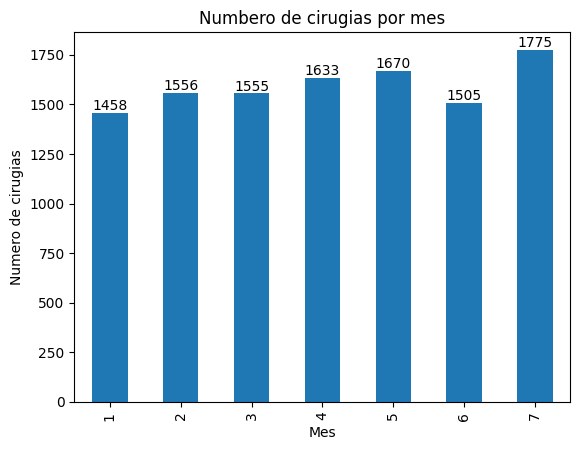

In [14]:
# Group the data by month and count the number of values
values_per_month = df2['Fecha planif.'].groupby(df2['Fecha planif.'].dt.month).count()

# Create a bar plot of the number of values per month
values_per_month.plot(kind='bar')

# Set the labels and title
plt.xlabel('Mes')
plt.ylabel('Numero de cirugias')
plt.title('Numbero de cirugias por mes')

# Add labels to the bars
for i, value in enumerate(values_per_month):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


In [15]:
# Calcular el la estadística descriptiva de las cirugias por mes
average_surgeries_per_month = values_per_month.describe()
average_surgeries_per_month


count       7.000000
mean     1593.142857
std       107.575444
min      1458.000000
25%      1530.000000
50%      1556.000000
75%      1651.500000
max      1775.000000
Name: Fecha planif., dtype: float64

**Conclusión**

Durante el año 2024 el numero de cirugias max fueron 1775 en el mes de julio        
el min 1458 en el mes de enero  
en promedio se realizaron 1593 cirugias al mes

In [16]:

# Count the number of values per month and quirofano

values_per_quirofano_month = df2.groupby([df2['Fecha planif.'].dt.month, 'Quirofano']).size().reset_index(name='count')
values_per_quirofano_month

#filtered_data = values_per_quirofano_month[values_per_quirofano_month['Quirofano'] == 'QU-10']
#print(filtered_data)


,Fecha planif.,Quirofano,count
0,1,QU-01,262
1,1,QU-02,123
2,1,QU-03,178
3,1,QU-04,211
4,1,QU-05,68
...,...,...,...
77,7,QU-08,136
78,7,QU-09,131
79,7,QU-10,108
80,7,QU-11,199


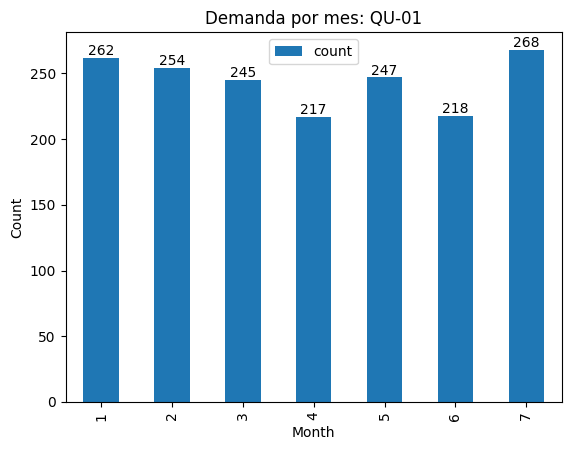

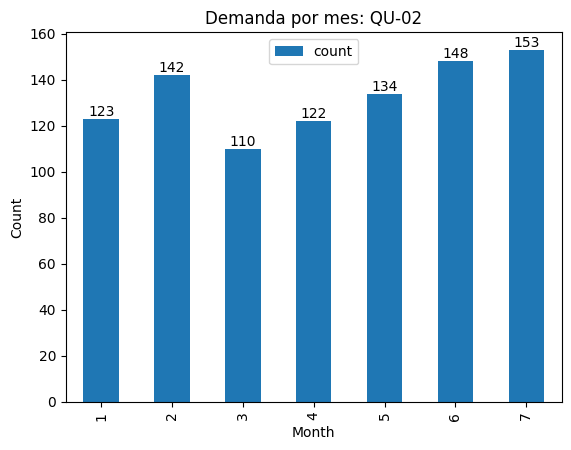

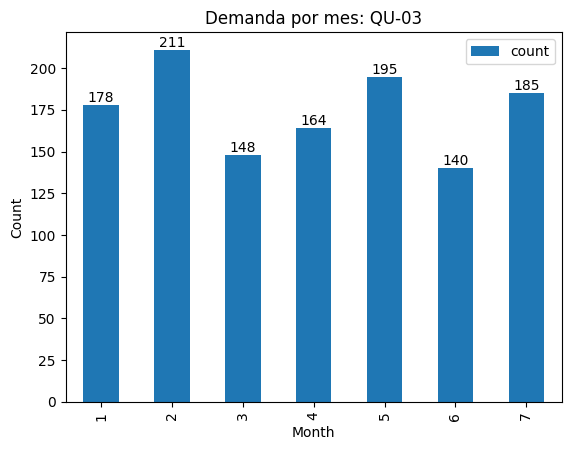

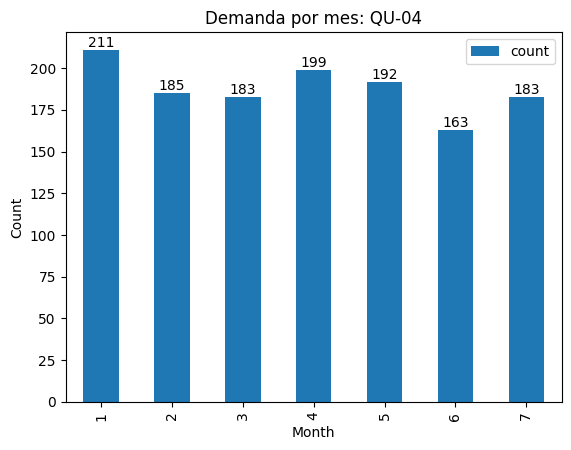

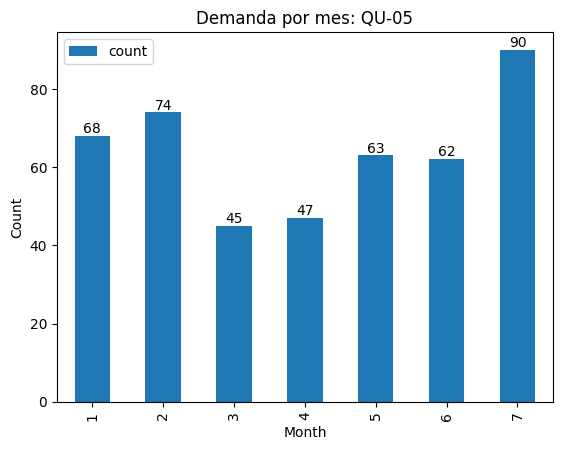

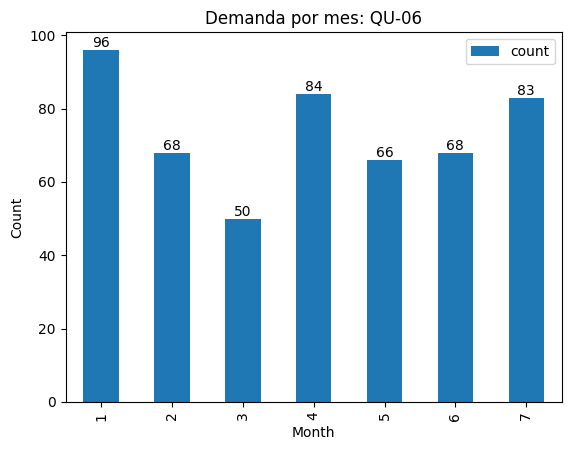

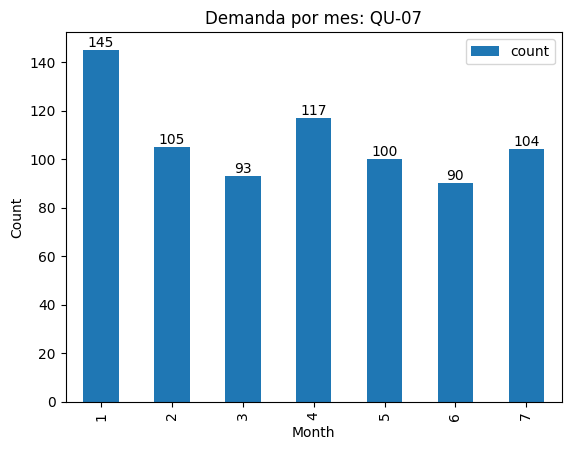

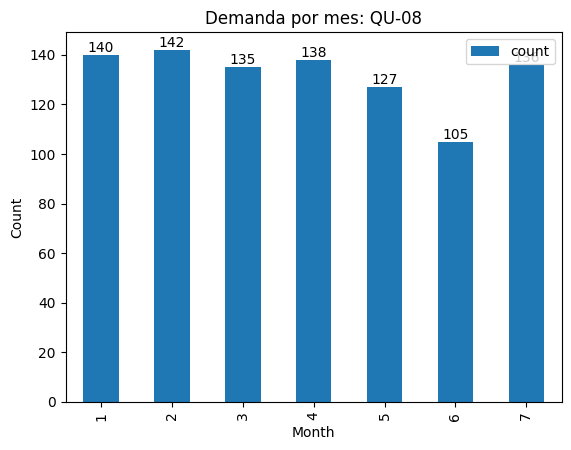

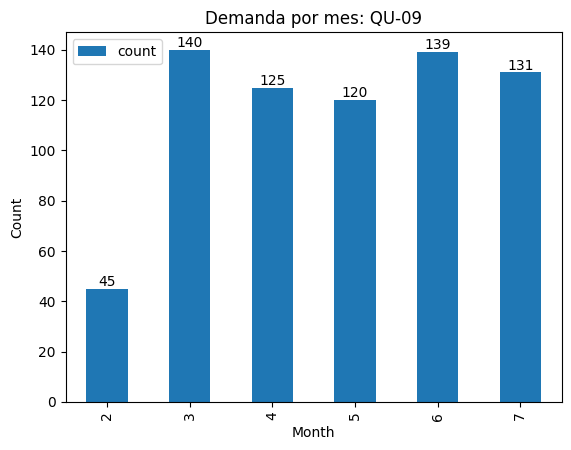

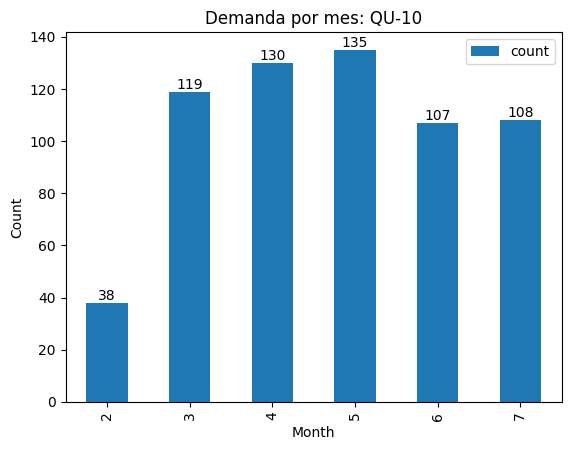

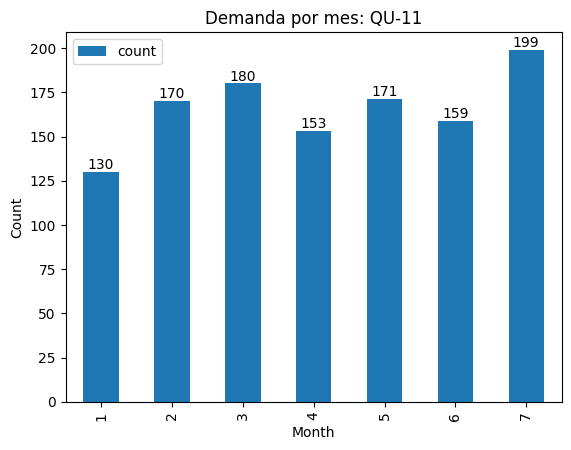

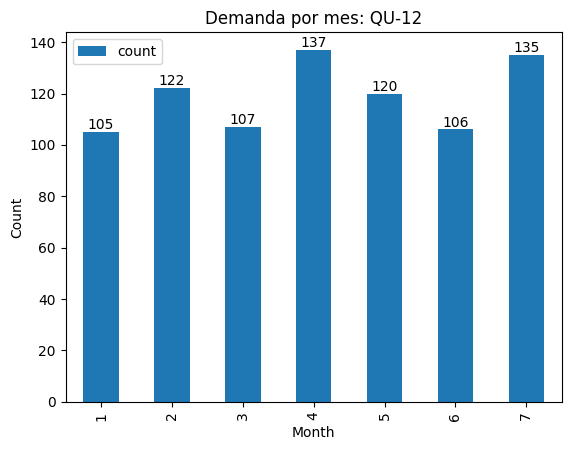

In [17]:

quirofano_values = ['QU-01', 'QU-02', 'QU-03', 'QU-04', 'QU-05', 'QU-06', 'QU-07', 'QU-08', 'QU-09', 'QU-10', 'QU-11', 'QU-12']
for quirofano in quirofano_values:

    filtered_data = values_per_quirofano_month[values_per_quirofano_month['Quirofano'] == quirofano]
    # Group the filtered data by month and count the number of values
    filtered_data_per_month = filtered_data.groupby('Fecha planif.').sum()

    # Create a bar plot of the filtered data per month
    filtered_data_per_month.plot(kind='bar')

    for i, value in enumerate(filtered_data['count']):
        plt.text(i, value, str(value), ha='center', va='bottom')

    

    # Set the labels and title
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title(f'Demanda por mes: {quirofano}')

    # Show the plot
    plt.show()

In [18]:
df2['Mes']=df2['Fecha planif.'].dt.month
# Agrupar los datos por mes y quirofano y calcular el promedio de cirugias por mes
promedio_cirugias_por_quirofano = df2.groupby(['Mes', 'Quirofano'])['Episodio'].count().reset_index()
promedio_cirugias_por_quirofano = promedio_cirugias_por_quirofano.groupby('Quirofano')['Episodio'].mean()

# Mostrar el resultado

promedio_cirugias_por_quirofano = promedio_cirugias_por_quirofano.round(2)
print(promedio_cirugias_por_quirofano)

Quirofano
QU-01    244.43
QU-02    133.14
QU-03    174.43
QU-04    188.00
QU-05     64.14
QU-06     73.57
QU-07    107.71
QU-08    131.86
QU-09    116.67
QU-10    106.17
QU-11    166.00
QU-12    118.86
Name: Episodio, dtype: float64


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11152 entries, 0 to 11160
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha planif.             11152 non-null  datetime64[ns]
 1   Hora planif.              11152 non-null  object        
 2   Fecha apertura monitor    11152 non-null  datetime64[ns]
 3   Hora apertura monitor     11152 non-null  object        
 4   Tiempo Transc (en MIN).   11152 non-null  int64         
 5   Quirofano                 11152 non-null  object        
 6   Duración                  11152 non-null  int64         
 7   Sexo                      11152 non-null  object        
 8   Edad                      11152 non-null  int64         
 9   Episodio                  11152 non-null  int64         
 10  Especialidad              11045 non-null  object        
 11  Incisión - Inicio         11152 non-null  object        
 12  Sutura - Fin           

In [20]:
# Convertir la columna "Cirugia - Duración" a formato datetime para calcular la duracion de la cirugia en horas

df2['Cirugia - Duración'] = pd.to_datetime(df2['Cirugia - Duración'].astype(str))
df2['Minutos'] = df2['Cirugia - Duración'].dt.minute
df2['Horas'] = df2['Cirugia - Duración'].dt.hour
df2['Segundos'] = df2['Cirugia - Duración'].dt.second

df2['Duracion'] = df2['Horas'] + df2['Minutos']/60 + df2['Segundos']/3600
df2['Duracion'] = df2['Duracion'].astype(float)
df2['Mes']=df2['Fecha planif.'].dt.month

print(df2['Cirugia - Duración'].head())
print(df2['Duracion'].head())


0   2024-09-06 00:41:20
1   2024-09-06 00:30:00
2   2024-09-06 03:05:00
3   2024-09-06 02:25:00
4   2024-09-06 01:06:23
Name: Cirugia - Duración, dtype: datetime64[ns]
0    0.688889
1    0.500000
2    3.083333
3    2.416667
4    1.106389
Name: Duracion, dtype: float64


C:\Users\david\AppData\Local\Temp\ipykernel_19580\1011806139.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Cirugia - Duración'] = pd.to_datetime(df2['Cirugia - Duración'].astype(str))


In [32]:
df2['Duracion'].describe()

count    11152.000000
mean         1.091039
std          1.209232
min          0.000000
25%          0.416667
50%          0.750000
75%          1.333333
max         23.666667
Name: Duracion, dtype: float64

**Conclusión**

La duracion de la cirugia promedio es de 1 hora aprox. y una desviación estandar de 1,2 horas 

In [21]:

#Sum the duration for each Quirofano
sum_duration_per_quirofano = df2.groupby(['Mes','Quirofano'])['Duracion'].sum().reset_index(name='Tiempo Requerido Mensual')

#Print the sum of duration per Quirofano
sum_duration_per_quirofano

,Mes,Quirofano,Tiempo Requerido Mensual
0,1,QU-01,205.667500
1,1,QU-02,106.546667
2,1,QU-03,141.388611
3,1,QU-04,199.357778
4,1,QU-05,150.675833
...,...,...,...
77,7,QU-08,162.727500
78,7,QU-09,186.834722
79,7,QU-10,169.753056
80,7,QU-11,142.967222


In [23]:
# Leer el conjunto de datos por medio de la URL proporcionada y asignarlo a la variable "df"

# Load the Excel file from the GitHub repository
url = "https://raw.githubusercontent.com/DavidD95/Clase_EDA_2024/main/DISPONIBILIDAD_QU.xlsx"
%pip install openpyxl
disponibilidad_QU = pd.read_excel(url)

Note: you may need to restart the kernel to use updated packages.


In [24]:

# convertir la columna "Tiempo Disponible Mes" a formato datetime para calcular la disponibilidad en horas
disponibilidad_QU['Hora Disponible Mes'] = disponibilidad_QU['Tiempo Disponible Mes'].dt.components['days']*24 + disponibilidad_QU['Tiempo Disponible Mes'].dt.components['hours'] + disponibilidad_QU['Tiempo Disponible Mes'].dt.components['minutes']/60
disponibilidad_QU[['Mes', 'Quirofano', 'Hora Disponible Mes']]

print(disponibilidad_QU)



    Mes Quirofano  Dias Tiempo Disponible dia Tiempo Disponible Mes  \
0     1     QU-01    21       0 days 10:00:00       8 days 18:00:00   
1     1     QU-02    21       0 days 08:00:00       7 days 00:00:00   
2     1     QU-03    21       0 days 10:00:00       8 days 18:00:00   
3     1     QU-04    21       0 days 10:00:00       8 days 18:00:00   
4     1     QU-05    21       0 days 08:00:00       7 days 00:00:00   
..  ...       ...   ...                   ...                   ...   
79    7     QU-08    22       0 days 10:00:00       9 days 04:00:00   
80    7     QU-09    22       0 days 10:00:00       9 days 04:00:00   
81    7     QU-10    22       0 days 10:00:00       9 days 04:00:00   
82    7     QU-11    22       0 days 10:00:00       9 days 04:00:00   
83    7     QU-12    22       0 days 08:00:00       7 days 08:00:00   

    Hora Disponible Mes  
0                 210.0  
1                 168.0  
2                 210.0  
3                 210.0  
4                

In [25]:

# Merge the dataframes
# combinar los dataframes "sum_duration_per_quirofano" y "disponibilidad_QU" utilizando la columna "Mes" y "Quirofano" como clave
df3 = pd.merge(sum_duration_per_quirofano, disponibilidad_QU, on=['Mes', 'Quirofano'])
df3['Utilizacion'] = df3['Tiempo Requerido Mensual'] / df3['Hora Disponible Mes']
df3


,Mes,Quirofano,Tiempo Requerido Mensual,Dias,Tiempo Disponible dia,Tiempo Disponible Mes,Hora Disponible Mes,Utilizacion
0,1,QU-01,205.667500,21,0 days 10:00:00,8 days 18:00:00,210.0,0.979369
1,1,QU-02,106.546667,21,0 days 08:00:00,7 days 00:00:00,168.0,0.634206
2,1,QU-03,141.388611,21,0 days 10:00:00,8 days 18:00:00,210.0,0.673279
3,1,QU-04,199.357778,21,0 days 10:00:00,8 days 18:00:00,210.0,0.949323
4,1,QU-05,150.675833,21,0 days 08:00:00,7 days 00:00:00,168.0,0.896880
...,...,...,...,...,...,...,...,...
77,7,QU-08,162.727500,22,0 days 10:00:00,9 days 04:00:00,220.0,0.739670
78,7,QU-09,186.834722,22,0 days 10:00:00,9 days 04:00:00,220.0,0.849249
79,7,QU-10,169.753056,22,0 days 10:00:00,9 days 04:00:00,220.0,0.771605
80,7,QU-11,142.967222,22,0 days 10:00:00,9 days 04:00:00,220.0,0.649851


In [26]:

# Calculate the percentage of time used per Quirofano
df3['Porcentaje Utilizado'] = df3['Tiempo Requerido Mensual'] / df3['Hora Disponible Mes'] * 100

# Show the dataframe
df3



,Mes,Quirofano,Tiempo Requerido Mensual,Dias,Tiempo Disponible dia,Tiempo Disponible Mes,Hora Disponible Mes,Utilizacion,Porcentaje Utilizado
0,1,QU-01,205.667500,21,0 days 10:00:00,8 days 18:00:00,210.0,0.979369,97.936905
1,1,QU-02,106.546667,21,0 days 08:00:00,7 days 00:00:00,168.0,0.634206,63.420635
2,1,QU-03,141.388611,21,0 days 10:00:00,8 days 18:00:00,210.0,0.673279,67.327910
3,1,QU-04,199.357778,21,0 days 10:00:00,8 days 18:00:00,210.0,0.949323,94.932275
4,1,QU-05,150.675833,21,0 days 08:00:00,7 days 00:00:00,168.0,0.896880,89.687996
...,...,...,...,...,...,...,...,...,...
77,7,QU-08,162.727500,22,0 days 10:00:00,9 days 04:00:00,220.0,0.739670,73.967045
78,7,QU-09,186.834722,22,0 days 10:00:00,9 days 04:00:00,220.0,0.849249,84.924874
79,7,QU-10,169.753056,22,0 days 10:00:00,9 days 04:00:00,220.0,0.771605,77.160480
80,7,QU-11,142.967222,22,0 days 10:00:00,9 days 04:00:00,220.0,0.649851,64.985101


In [27]:

# Eliminar las columnas innecesarias para el calculo de la utilización de los quirofanos
df3 = df3.drop(['Dias', 'Tiempo Disponible dia', 'Tiempo Disponible Mes'], axis=1)
df3

,Mes,Quirofano,Tiempo Requerido Mensual,Hora Disponible Mes,Utilizacion,Porcentaje Utilizado
0,1,QU-01,205.667500,210.0,0.979369,97.936905
1,1,QU-02,106.546667,168.0,0.634206,63.420635
2,1,QU-03,141.388611,210.0,0.673279,67.327910
3,1,QU-04,199.357778,210.0,0.949323,94.932275
4,1,QU-05,150.675833,168.0,0.896880,89.687996
...,...,...,...,...,...,...
77,7,QU-08,162.727500,220.0,0.739670,73.967045
78,7,QU-09,186.834722,220.0,0.849249,84.924874
79,7,QU-10,169.753056,220.0,0.771605,77.160480
80,7,QU-11,142.967222,220.0,0.649851,64.985101


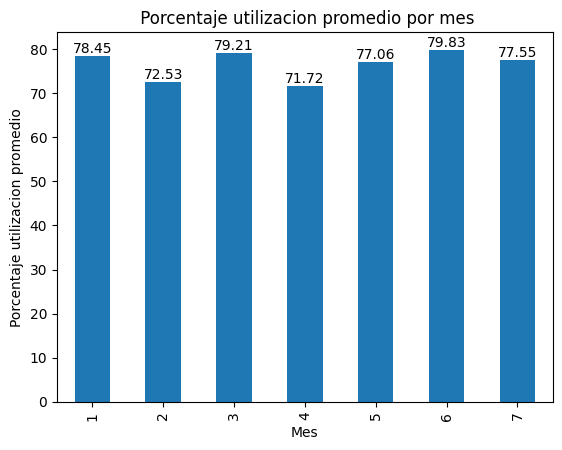

In [28]:

# Calcular el porcentaje utilizado promedio por mes
df4 = df3.groupby('Mes')['Porcentaje Utilizado'].mean()
df4

# Create a bar plot of the average percentage used per month
df4.plot(kind='bar')

# Set the labels and title
plt.xlabel('Mes')
plt.ylabel('Porcentaje utilizacion promedio')
plt.title(' Porcentaje utilizacion promedio por mes')

# Add labels to the bars
for i, value in enumerate(df4):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Show the plot
plt.show()



In [29]:
#Estadisticas descriptivas de la utilizacion de los quirofanos
df4.describe()

count     7.000000
mean     76.620422
std       3.219134
min      71.718561
25%      74.793600
50%      77.548385
75%      78.829085
max      79.830639
Name: Porcentaje Utilizado, dtype: float64

**Conclusión**

Segun los datos el promedio de utilización de los quirofanos en lo que va transcurrido del 2024 es de **76.62%**

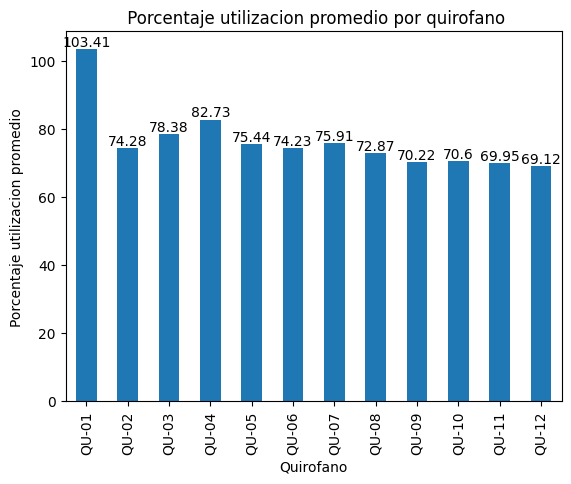

In [30]:

# Calcular el porcentaje utilizado promedio por quirofano
df5 = df3.groupby('Quirofano')['Porcentaje Utilizado'].mean()
df5

# Create a bar plot of the average percentage used per Quirofano
df5.plot(kind='bar')

# Set the labels and title
plt.xlabel('Quirofano')
plt.ylabel('Porcentaje utilizacion promedio')
plt.title(' Porcentaje utilizacion promedio por quirofano')

# Add labels to the bars
for i, value in enumerate(df5):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Show the plot
plt.show()



In [31]:
print ("Numero de procedimientos diferentes =",df['Procedimiento'].nunique())

print ("Numero de especialidades diferentes =",df['Especialidad'].nunique())



Numero de procedimientos diferentes = 1063
Numero de especialidades diferentes = 88


In [40]:

# Calcular el número de cirugias por especialidad
cirugias_por_especialidad = df2['Especialidad'].value_counts()


# Calculate the percentage of surgeries per specialty
percentage_surgeries_per_specialty = (cirugias_por_especialidad / cirugias_por_especialidad.sum()) * 100



# Combine the two series into a single dataframe
combined_data = pd.concat([cirugias_por_especialidad, percentage_surgeries_per_specialty], axis=1)
combined_data.columns = ['Cirugias por Especialidad', 'Porcentaje de Cirugias por Especialidad']

# Display the combined dataframe
combined_data.head(10)


,Cirugias por Especialidad,Porcentaje de Cirugias por Especialidad
Especialidad,,
GINECOLOGIA Y OBSTETRICIA,1273,11.525577
MEDICINA GENERAL,876,7.931191
OFTALMOLOGIA,675,6.111363
PEDIATRIA,667,6.038932
ORTOPEDIA Y TRAUMATOLOGIA,662,5.993662
UROLOGIA,597,5.405161
INTENSIVISTA,569,5.151652
CIRUGIA DE TRAUMA Y EMERGENCIA,501,4.535989
MEDICINA INTERNA,492,4.454504


**Conclusión**

La tabla anterior muestra el pareto de las 10 especialidades mas frecuentes en el servico de cirugia la especialidad que mas se realizan procedimientos es GINECOLOGIA Y OBSTETRICIA con el 11.5%


In [41]:
# Calculate the frequency of each priority
frequency_table = df2['Prioridad solicitud'].value_counts()

# Calculate the percentage of each priority
percentage_table = (frequency_table / frequency_table.sum()) * 100

# Combine the two series into a single dataframe
combined_table = pd.concat([frequency_table, percentage_table], axis=1)
combined_table.columns = ['Frequency', 'Percentage']

# Display the frequency table
combined_table

,Frequency,Percentage
Prioridad solicitud,,
Urgente,5682,50.950502
Electiva,4038,36.208752
Urg. Relativa,1011,9.065638
Emergente,418,3.748207
Cheq. Ejecutivo,3,0.026901


**Conclusión**

A partir de los datos podemos concluir que el 50,9% de los procedimientos realizados se consideraron de caracter urgente